In [1]:
import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
%matplotlib inline

In [2]:
from sklearn.cluster import	KMeans
# from scipy.spatial.distance import cdist 

In [3]:
Autoinsurance = pd.read_csv("AutoInsurance (1).csv")
Autoinsurance

Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0     Bachelor           2/24/11         Employed      F   56274  ...   
1     Bachelor           1/31/11       Unemployed      F       0  ...   
2     Bachelor           2/19/11         Employed      F   48767  ...   
3     Bachelor           1/20/11       Unemployed      M       0  ...   
4     Bachelor          3/2/2011         Employed      M   43836  ...   
...        ...               ...              ...    ...     ...  ...   
9129  Bachelor         10/2/2011         Employed      M   71941  ...   
9130   College         12/2/2011         Employed      F   21604  ...   
9131  Bachelor          6/2/2011       Unemployed      M       0  ...   
9132   College          3/2/2011         Employed      M   21941  ...   
9133   College           2/14/11       Unemployed      M       0  ...   

     Months Since Policy Inception Number of Open Complaints  \
0                                5                         0   
1                               42                         0   
2                               38                         0   
3                               65                         0   
4                               44                         0   
...                            ...                       ...   
9129                            89                         0   
9130                            28                         0   
9131                            37                         3   
9132                             3                         0   
9133                            90                         0   

      Number of Policies     Policy Type        Policy  Renew Offer Type  \
0                      1  Corporate Auto  Corporate L3            Offer1   
1                      8   Personal Auto   Personal L3            Offer3   
2                      2   Personal Auto   Personal L3            Offer1   
3                      7  Corporate Auto  Corporate L2            Offer1   
4                      1   Personal Auto   Personal L1            Offer1   
...                  ...             ...           ...               ...   
9129                   2   Personal Auto   Personal L1            Offer2   
9130                   1  Corporate Auto  Corporate L3            Offer1   
9131                   2  Corporate Auto  Corporate L2            Offer1   
9132                   3   Personal Auto   Personal L2            Offer3   
9133                   1  Corporate Auto  Corporate L3            Offer4   

      Sales Channel Total Claim Amount  Vehicle Class Vehicle Size  
0             Agent         384.811147   Two-Door Car      Medsize  
1             Agent        1131.464935  Four-Door Car      Medsize  
2             Agent         566.472247   Two-Door Car      Medsize  
3       Call Center         529.881344            SUV      Medsize  
4             Agent         138.130879  Four-Door Car      Medsize  
...             ...                ...            ...          ...  
9129            Web         198.234764  Four-Door Car      Medsize  
9130         Bran

In [4]:
numerical_features = [feature for feature in Autoinsurance.columns if Autoinsurance[feature].dtypes != 'O'] # list comprehension feature that are not equal to object type

print('Number of numerical variables: ', len(numerical_features))

Autoinsurance[numerical_features].head()

Number of numerical variables:  8


Customer Lifetime Value  Income  Monthly Premium Auto  \
0              2763.519279   56274                    69   
1              6979.535903       0                    94   
2             12887.431650   48767                   108   
3              7645.861827       0                   106   
4              2813.692575   43836                    73   

   Months Since Last Claim  Months Since Policy Inception  \
0                       32                              5   
1                       13                             42   
2                       18                             38   
3                       18                             65   
4                       12                             44   

   Number of Open Complaints  Number of Policies  Total Claim Amount  
0                          0                   1          384.811147  
1                          0                   8         1131.464935  
2                          0                   2          566.472247  
3                          0                   7          529.881344  
4                          0                   1          138.130879

In [5]:
dataset = Autoinsurance[numerical_features]
dataset

Customer Lifetime Value  Income  Monthly Premium Auto  \
0                 2763.519279   56274                    69   
1                 6979.535903       0                    94   
2                12887.431650   48767                   108   
3                 7645.861827       0                   106   
4                 2813.692575   43836                    73   
...                       ...     ...                   ...   
9129             23405.987980   71941                    73   
9130              3096.511217   21604                    79   
9131              8163.890428       0                    85   
9132              7524.442436   21941                    96   
9133              2611.836866       0                    77   

      Months Since Last Claim  Months Since Policy Inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      Number of Open Complaints  Number of Policies  Total Claim Amount  
0                             0                   1          384.811147  
1                             0                   8         1131.464935  
2                             0                   2          566.472247  
3                             0                   7          529.881344  
4                             0                   1          138.130879  
...                         ...                 ...                 ...  
9129                          0                   2          198.234764  
9130                          0                   1          379.200000  
9131                          3                   2          790.784983  
9132                          0                   3          691.200000  
9133                          0                   1          369.600000  

[9134 rows x 8 columns]

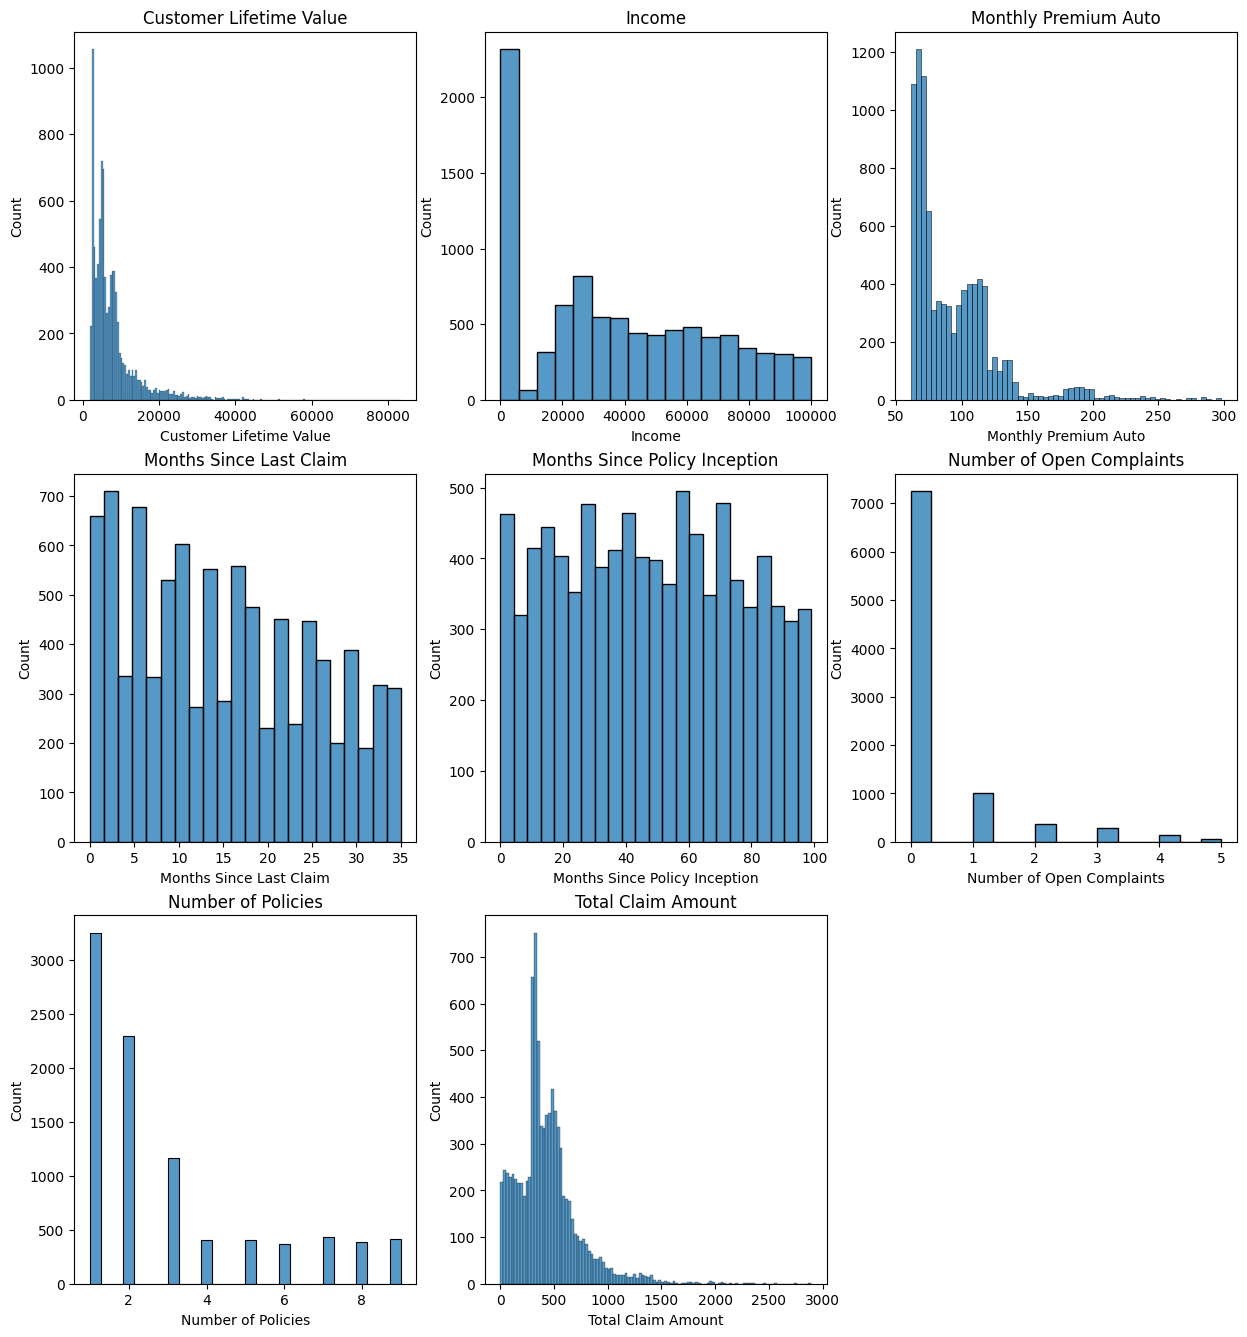

In [6]:

a = 4  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,22))

for i in dataset.columns:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i))

    sns.histplot(data= dataset, x= i)

    c = c + 1

plt.show()

In [7]:

# Create dummy variables
df_new = pd.get_dummies(Autoinsurance)
df_new_1 = pd.get_dummies(Autoinsurance, drop_first = True)
# we have created dummies for all categorical columns

In [8]:
from sklearn.preprocessing import OneHotEncoder

In [9]:
# Creating instance of One Hot Encoder
enc = OneHotEncoder() # initializing method

In [10]:
enc_df = pd.DataFrame(enc.fit_transform(Autoinsurance.iloc[:, :]).toarray())


In [11]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder

In [12]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

In [13]:
# Data Split into Input and Output variables
X = Autoinsurance.iloc[:, :]
y = Autoinsurance["Vehicle Size"]

In [14]:
categorical_features=[feature for feature in Autoinsurance.columns if Autoinsurance[feature].dtypes=='O']
categorical_features



['Customer',
 'State',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size']

In [15]:
for i in categorical_features:
    X[i]= labelencoder.fit_transform(X[i])

In [16]:
y = labelencoder.fit_transform(y) 
y = pd.DataFrame(y)

## concatenate X and y

In [17]:
df_new = pd.concat([X, y], axis =1)

In [18]:
df_new.columns
df_new = df_new.rename(columns={0:'Type'})

In [19]:
df_new.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Type'],
      dtype='object')

In [20]:
df_new

Customer  State  Customer Lifetime Value  Response  Coverage  Education  \
0          600      4              2763.519279         0         0          0   
1         5946      0              6979.535903         0         1          0   
2           96      2             12887.431650         0         2          0   
3         8016      1              7645.861827         0         0          0   
4         2488      4              2813.692575         0         0          0   
...        ...    ...                      ...       ...       ...        ...   
9129      3857      1             23405.987980         0         0          0   
9130      5390      1              3096.511217         1         1          1   
9131      6688      1              8163.890428         0         1          0   
9132      7214      1              7524.442436         0         1          1   
9133      8434      1              2611.836866         0         1          1   

      Effective To Date  EmploymentStatus  Gender  Income  ...  \
0                    40                 1       0   56274  ...   
1                    20                 4       0       0  ...   
2                    34                 1       0   48767  ...   
3                     9                 4       1       0  ...   
4                    46                 1       1   43836  ...   
...                 ...               ...     ...     ...  ...   
9129                 22                 1       1   71941  ...   
9130                 26                 1       0   21604  ...   
9131                 52                 4       1       0  ...   
9132                 46                 1       1   21941  ...   
9133                 29                 4       1       0  ...   

      Number of Open Complaints  Number of Policies  Policy Type  Policy  \
0                             0                   1            0       2   
1                             0                   8            1       5   
2                             0                   2            1       5   
3                             0                   7            0       1   
4                             0                   1            1       3   
...                         ...                 ...          ...     ...   
9129                          0                   2            1       3   
9130                          0                   1            0       2   
9131                          3                   2            0       1   
9132                          0                   3            1       4   
9133                          0                   1            0       2   

      Renew Offer Type  Sales Channel  Total Claim Amount  Vehicle Class  \
0                    0              0          384.811147              5   
1                    2              0         1131.464935              0   
2                    0              0          566.472247              5   
3                    0              2          529.881344              3   
4                    0              0          138.130879              0   
...                ...            ...                 ...            ...   
9129                 1              3          198.234764              0   
9130                 0              1          379.200000              0   
9131                 0              1          790.784983              0   
9132                 2              1          691.200000              0   
9133                 3              2          369.600000              5   

      Vehicle Size  Type  
0                1     1  
1                1     1  
2                1     1  
3                1     1  
4                1     1  
...            ...   ...  
9129             1     1  
9130             1     1  
9131             1     1  
9132             0     0  
9133             1     1  

[9134 rows x 25 columns]

In [21]:
dataset = df_new.copy()

In [22]:
a = 9  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,50))

for i in dataset.columns:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i))

    sns.histplot(data= dataset, x= i)

    c = c + 1

plt.show()

## Numerical variables are usually of 2 type
##  Continous variable and Discrete Variables

# decreate values

In [23]:


discrete_feature=[feature for feature in Autoinsurance.columns if len(Autoinsurance[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 16


In [24]:
discrete_feature

['State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size']

# Continous Features

In [25]:
continuous_feature=[feature for feature in Autoinsurance.columns if feature not in discrete_feature ]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 8


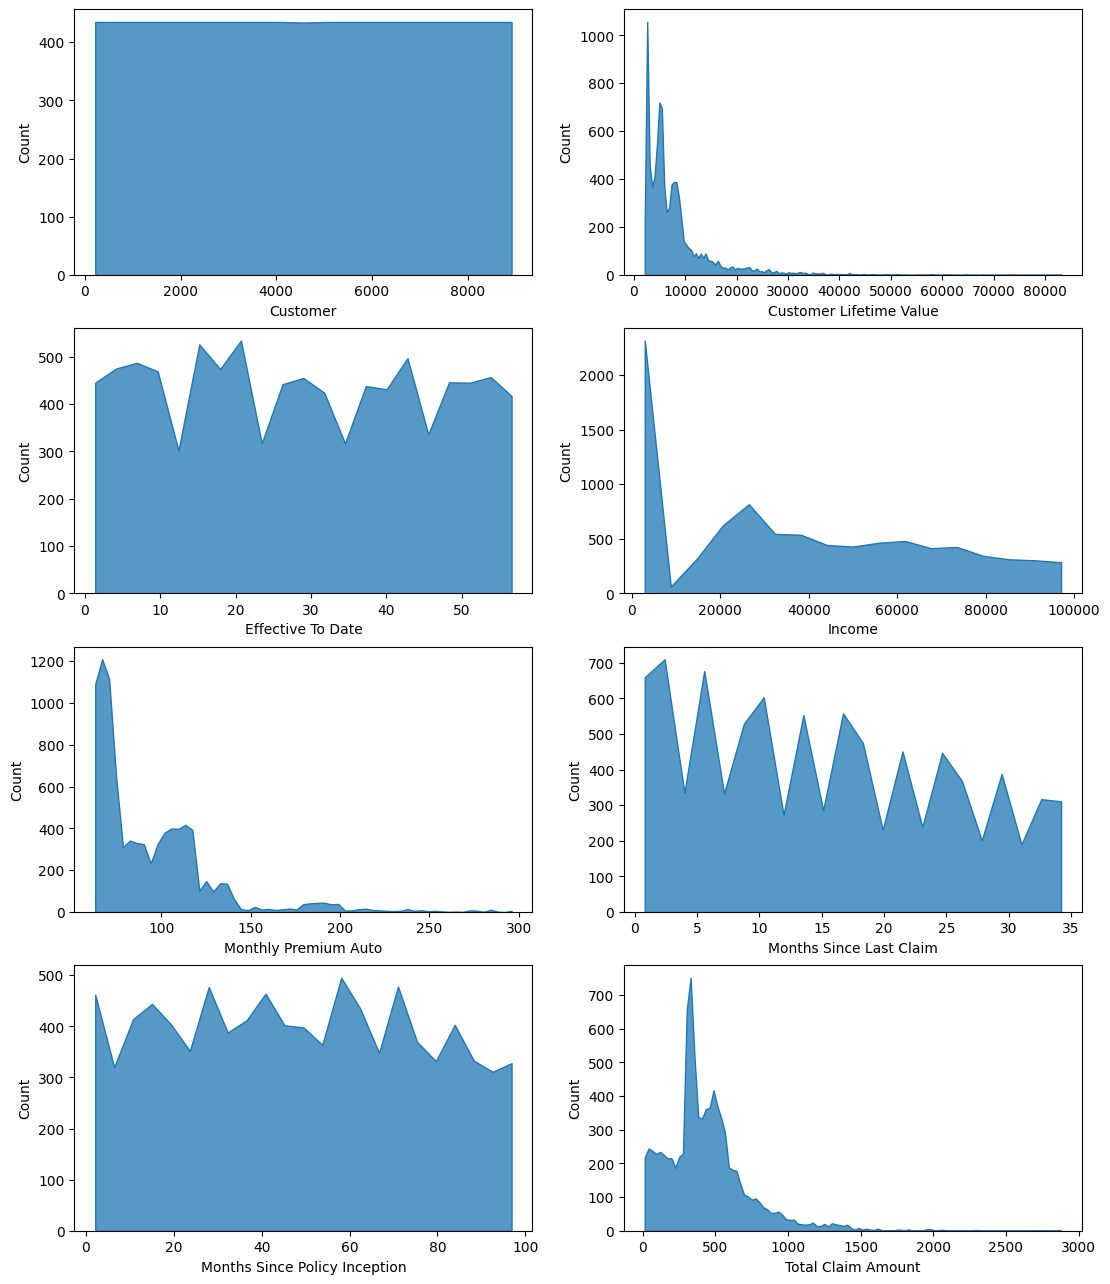

In [26]:
a = 5  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(13,20))

for i in continuous_feature:
    plt.subplot(a, b, c)

    sns.histplot(x= i ,data= Autoinsurance, element= "poly", palette="deep" )

    c = c + 1

plt.show()

## Checking for outliers

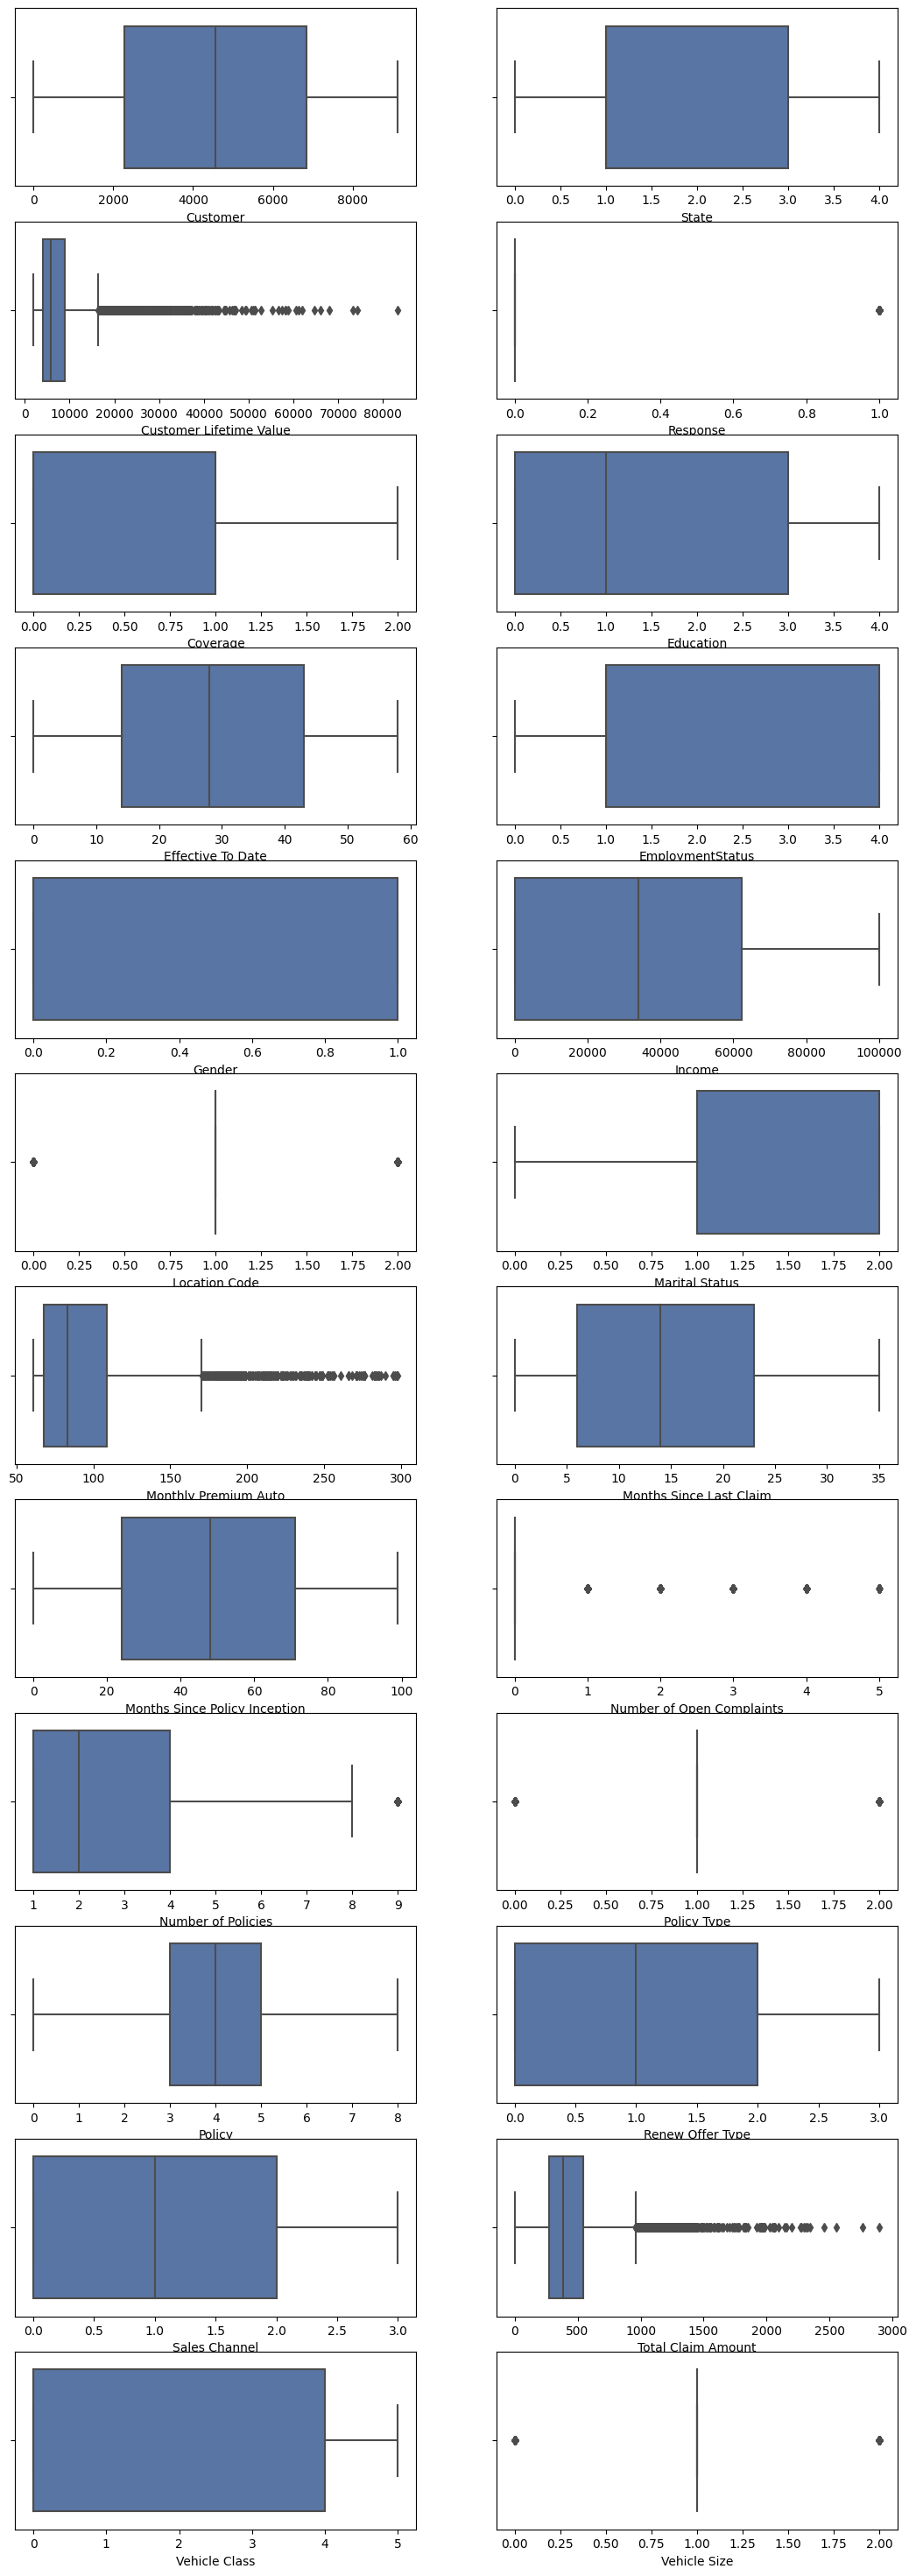

In [27]:
a = 16  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(13,50))

for i in Autoinsurance.columns:
    plt.subplot(a, b, c)

    sns.boxplot(x= i ,data= Autoinsurance, palette="deep" )

    c = c + 1

plt.show()

## from above we can see there are number of ouliers in the dataset

In [28]:
for i in Autoinsurance.columns:
    s = Autoinsurance[i]
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    iqr_lower = q1 - 1.5 * iqr
    iqr_upper = q3 + 1.5 * iqr
    outliers = dict(s[(s < iqr_lower) | (s > iqr_upper)])

    print(f"column {i} ",outliers ,"\n")

1696: 2, 1703: 0, 1705: 2, 1706: 2, 1711: 2, 1712: 0, 1715: 2, 1717: 2, 1723: 2, 1748: 2, 1749: 0, 1750: 2, 1751: 2, 1756: 0, 1763: 2, 1765: 2, 1774: 0, 1779: 2, 1780: 2, 1790: 2, 1791: 0, 1793: 0, 1799: 0, 1802: 2, 1806: 2, 1809: 2, 1810: 2, 1815: 2, 1817: 2, 1826: 0, 1827: 2, 1828: 0, 1838: 2, 1839: 2, 1840: 0, 1841: 2, 1843: 2, 1846: 2, 1855: 2, 1857: 2, 1858: 2, 1863: 2, 1871: 0, 1872: 2, 1874: 0, 1876: 0, 1878: 0, 1880: 0, 1884: 2, 1887: 0, 1890: 0, 1891: 2, 1898: 2, 1899: 2, 1902: 2, 1903: 2, 1904: 2, 1907: 2, 1915: 2, 1916: 2, 1917: 0, 1919: 0, 1920: 0, 1925: 2, 1926: 0, 1927: 2, 1933: 2, 1940: 0, 1941: 2, 1942: 0, 1944: 2, 1951: 0, 1952: 2, 1955: 0, 1957: 0, 1965: 0, 1967: 0, 1969: 2, 1970: 2, 1976: 2, 1983: 0, 1988: 0, 1992: 2, 1994: 0, 1995: 0, 1997: 2, 2001: 2, 2002: 2, 2006: 0, 2012: 2, 2014: 0, 2015: 0, 2018: 0, 2022: 2, 2023: 2, 2024: 2, 2028: 2, 2029: 2, 2030: 2, 2031: 2, 2035: 2, 2036: 2, 2037: 2, 2040: 2, 2052: 0, 2058: 2, 2059: 2, 2060: 0, 2063: 0, 2069: 0, 2070: 2, 2

## Replacing outlier with upper and lower limit

In [29]:
for i in Autoinsurance.columns:
    s = Autoinsurance[i]
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    iqr_lower = q1 - 1.5 * iqr
    iqr_upper = q3 + 1.5 * iqr

    Autoinsurance[i] = pd.DataFrame(np.where(Autoinsurance[i] > iqr_upper, iqr_upper, np.where(Autoinsurance[i] <  iqr_lower,  iqr_lower, Autoinsurance[i])))

## outliers Removed 

In [30]:
for i in Autoinsurance.columns:
    s = Autoinsurance[i]
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    iqr_lower = q1 - 1.5 * iqr
    iqr_upper = q3 + 1.5 * iqr
    outliers = dict(s[(s < iqr_lower) | (s > iqr_upper)])

    print(f"column {i} ",outliers ,"\n")

column Customer  {} 

column State  {} 

column Customer Lifetime Value  {} 

column Response  {} 

column Coverage  {} 

column Education  {} 

column Effective To Date  {} 

column EmploymentStatus  {} 

column Gender  {} 

column Income  {} 

column Location Code  {} 

column Marital Status  {} 

column Monthly Premium Auto  {} 

column Months Since Last Claim  {} 

column Months Since Policy Inception  {} 

column Number of Open Complaints  {} 

column Number of Policies  {} 

column Policy Type  {} 

column Policy  {} 

column Renew Offer Type  {} 

column Sales Channel  {} 

column Total Claim Amount  {} 

column Vehicle Class  {} 

column Vehicle Size  {} 



# K Mean Clustering 

In [31]:
# Normalization function 
def norm_func(i):
    x = (i - i.min())	/ (i.max() - i.min())
    return (x)

In [32]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(Autoinsurance.iloc[:, :])


In [33]:
df_norm.isna().sum() #missing values 

Customer                            0
State                               0
Customer Lifetime Value             0
Response                         9134
Coverage                            0
Education                           0
Effective To Date                   0
EmploymentStatus                    0
Gender                              0
Income                              0
Location Code                    9134
Marital Status                      0
Monthly Premium Auto                0
Months Since Last Claim             0
Months Since Policy Inception       0
Number of Open Complaints        9134
Number of Policies                  0
Policy Type                      9134
Policy                              0
Renew Offer Type                    0
Sales Channel                       0
Total Claim Amount                  0
Vehicle Class                       0
Vehicle Size                     9134
dtype: int64

In [34]:
columns_with_na = ["Response", "Location Code", "Number of Open Complaints", "Policy Type", "Vehicle Size"]

for i in columns_with_na:
    df_norm = df_norm.drop([i], axis=1)


df_norm.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Policies               0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
dtype: int64

In [35]:
###### scree plot or elbow curve ############
TWSS = []
k = [*range(2, 9)]

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)

Text(0, 0.5, 'total_within_SS')

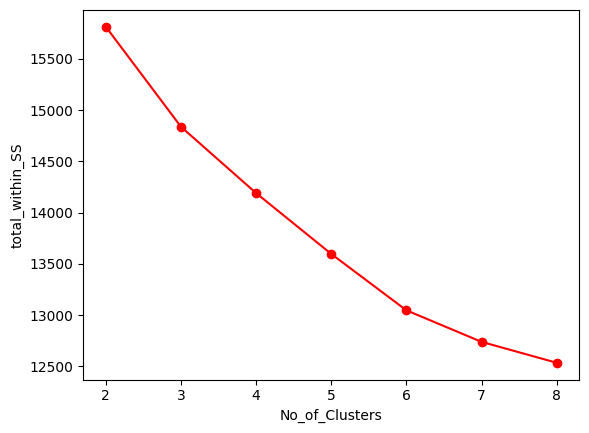

In [36]:
TWSS
# Scree plot 
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

## Selecting 6 clusters from above graph

In [47]:
# Selecting 3 clusters from the above scree plot which is the optimum number of clusters 
model = KMeans(n_clusters = 6)
model.fit(df_norm)

KMeans(n_clusters=6)

In [48]:
model.labels_ # getting the labels of clusters assigned to each row 
mb = pd.Series(model.labels_)  # converting numpy array into pandas series object 
Autoinsurance['clust'] = mb # creating a  new column and assigning it to new column

In [49]:
Autoinsurance.head()

Customer  State  Customer Lifetime Value  Response  Coverage  Education  \
0     600.0    4.0              2763.519279       0.0       0.0        0.0   
1    5946.0    0.0              6979.535903       0.0       1.0        0.0   
2      96.0    2.0             12887.431650       0.0       2.0        0.0   
3    8016.0    1.0              7645.861827       0.0       0.0        0.0   
4    2488.0    4.0              2813.692575       0.0       0.0        0.0   

   Effective To Date  EmploymentStatus  Gender   Income  ...  \
0               40.0               1.0     0.0  56274.0  ...   
1               20.0               4.0     0.0      0.0  ...   
2               34.0               1.0     0.0  48767.0  ...   
3                9.0               4.0     1.0      0.0  ...   
4               46.0               1.0     1.0  43836.0  ...   

   Number of Open Complaints  Number of Policies  Policy Type  Policy  \
0                        0.0                 1.0          1.0     2.0   
1                        0.0                 8.0          1.0     5.0   
2                        0.0                 2.0          1.0     5.0   
3                        0.0                 7.0          1.0     1.0   
4                        0.0                 1.0          1.0     3.0   

   Renew Offer Type  Sales Channel  Total Claim Amount  Vehicle Class  \
0               0.0            0.0          384.811147            5.0   
1               2.0            0.0          960.399730            0.0   
2               0.0            0.0          566.472247            5.0   
3               0.0            2.0          529.881344            3.0   
4               0.0            0.0          138.130879            0.0   

   Vehicle Size  clust  
0           1.0      0  
1           1.0      3  
2           1.0      0  
3           1.0      5  
4           1.0      1  

[5 rows x 25 columns]

In [50]:
df_norm.head()

Customer  State  Customer Lifetime Value  Coverage  Education  \
0  0.065696   1.00                 0.059625       0.0        0.0   
1  0.651046   0.00                 0.350063       0.5        0.0   
2  0.010511   0.50                 0.757054       1.0        0.0   
3  0.877696   0.25                 0.395966       0.0        0.0   
4  0.272419   1.00                 0.063081       0.0        0.0   

   Effective To Date  EmploymentStatus  Gender    Income  Marital Status  \
0           0.689655              0.25     0.0  0.562847             0.5   
1           0.344828              1.00     0.0  0.000000             1.0   
2           0.586207              0.25     0.0  0.487763             0.5   
3           0.155172              1.00     1.0  0.000000             0.5   
4           0.793103              0.25     1.0  0.438443             1.0   

   Monthly Premium Auto  Months Since Last Claim  \
0              0.073059                 0.914286   
1              0.301370                 0.371429   
2              0.429224                 0.514286   
3              0.410959                 0.514286   
4              0.109589                 0.342857   

   Months Since Policy Inception  Number of Policies  Policy  \
0                       0.050505            0.000000   0.250   
1                       0.424242            0.933333   0.625   
2                       0.383838            0.133333   0.625   
3                       0.656566            0.800000   0.125   
4                       0.444444            0.000000   0.375   

   Renew Offer Type  Sales Channel  Total Claim Amount  Vehicle Class  
0          0.000000       0.000000            0.400616            1.0  
1          0.666667       0.000000            1.000000            0.0  
2          0.000000       0.000000            0.589787            1.0  
3          0.000000       0.666667            0.551684            0.6  
4          0.000000       0.000000            0.143738            0.0

In [51]:
Autoinsurance.iloc[:, 2:8].groupby(Autoinsurance.clust).mean()

Customer Lifetime Value  Response  Coverage  Education  \
clust                                                           
0                  8424.801434       0.0  0.491218   1.612412   
1                  6234.560406       0.0  0.471230   1.565112   
2                  6235.836710       0.0  0.486486   1.541116   
3                  6963.042940       0.0  0.492981   1.478943   
4                  8164.998985       0.0  0.450641   1.569231   
5                  7065.304031       0.0  0.495652   1.532016   

       Effective To Date  EmploymentStatus  
clust                                       
0              27.476581          1.029274  
1              29.151423          1.087220  
2              29.522714          1.021852  
3              29.386457          3.925681  
4              28.389744          1.044231  
5              27.620553          3.923320

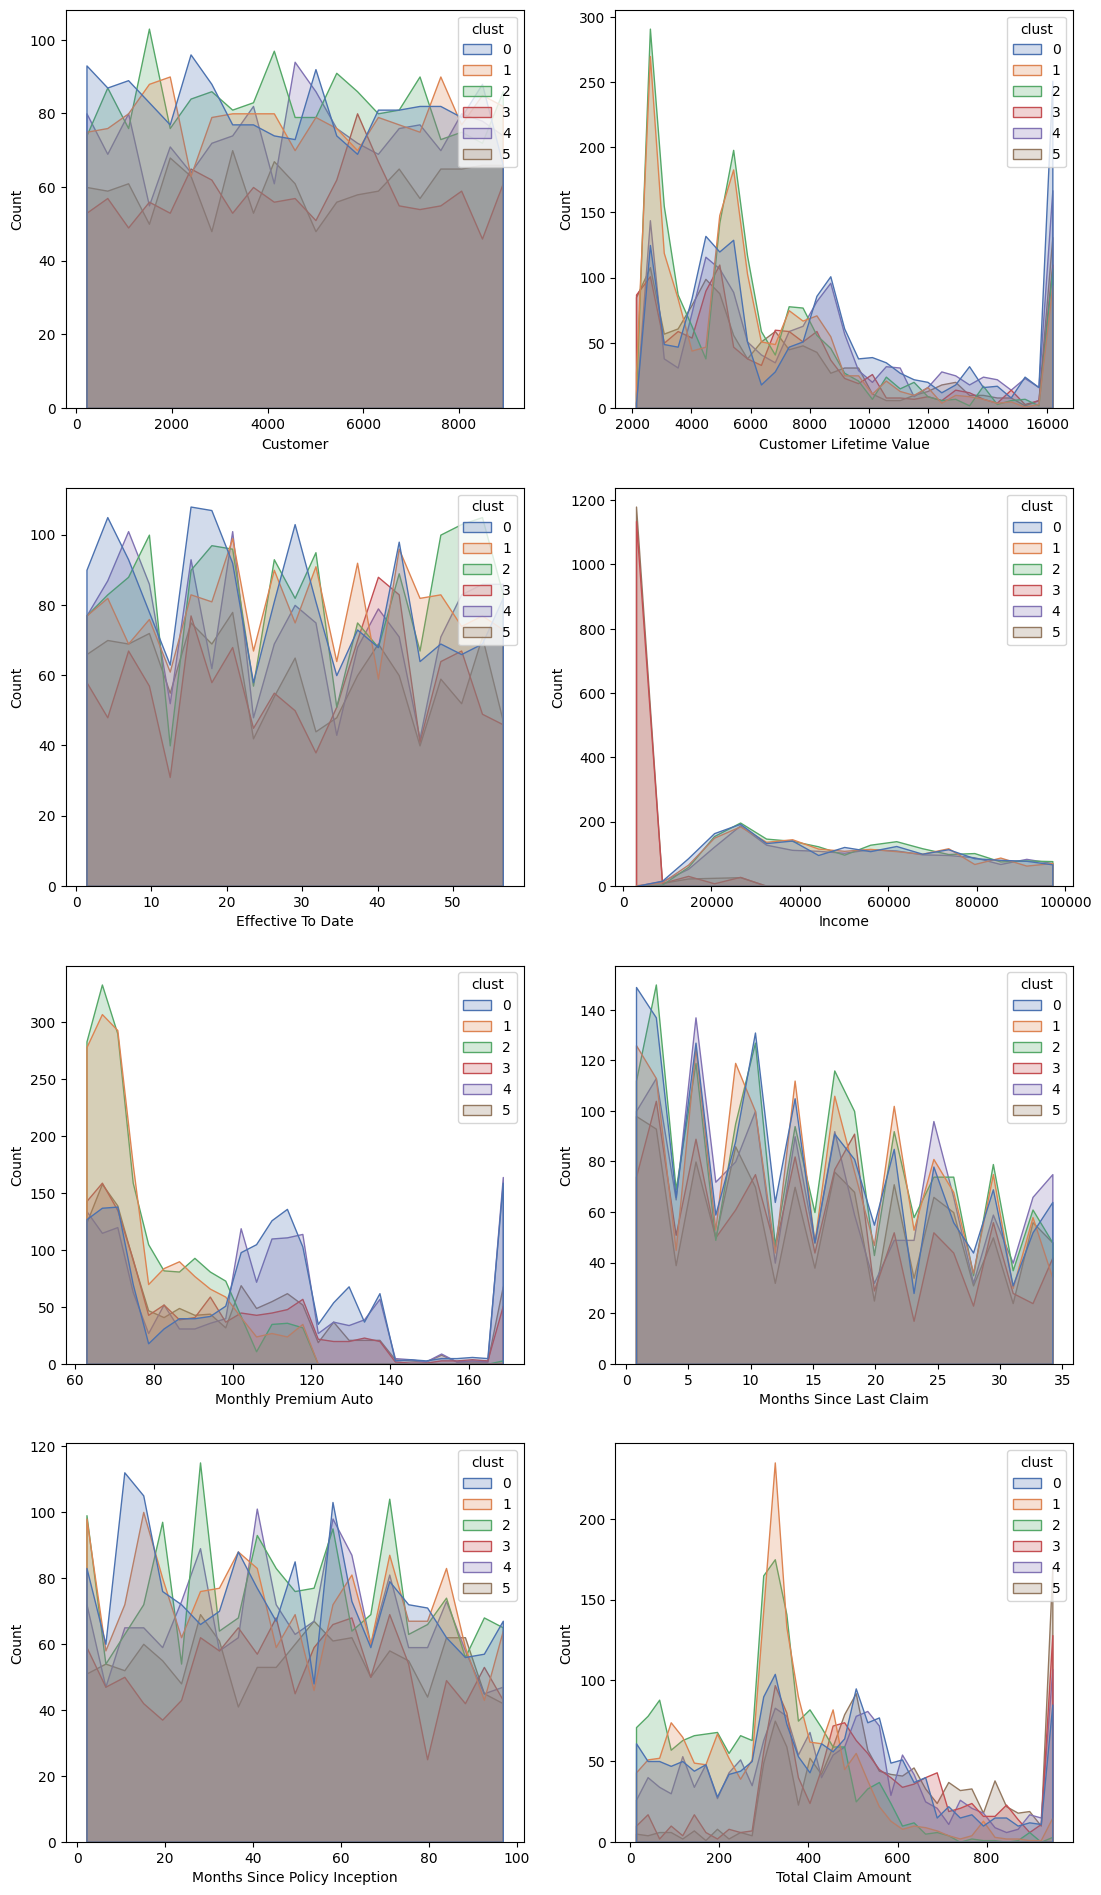

In [52]:
a = 5  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(13,30))

for i in continuous_feature:
    plt.subplot(a, b, c)

    sns.histplot(x= i,data= Autoinsurance, hue= "clust",palette="deep", element= "poly" )

    c = c + 1

plt.show()